In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from modules import dataset
from modules import detrend

from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Ridge, TheilSenRegressor, HuberRegressor, RANSACRegressor

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### specify the FAO dataset you want to retrieve

In [59]:
# global dataset vars
path = "data/Production_Crops_Livestock_E_All_Data.csv"
country = 'Argentina'
crop = "wheat"
quantity = "yield"
accuracy = "actual"

data = dataset.Dataset(path, country, crop, quantity, accuracy)
yield_data = data.dataset

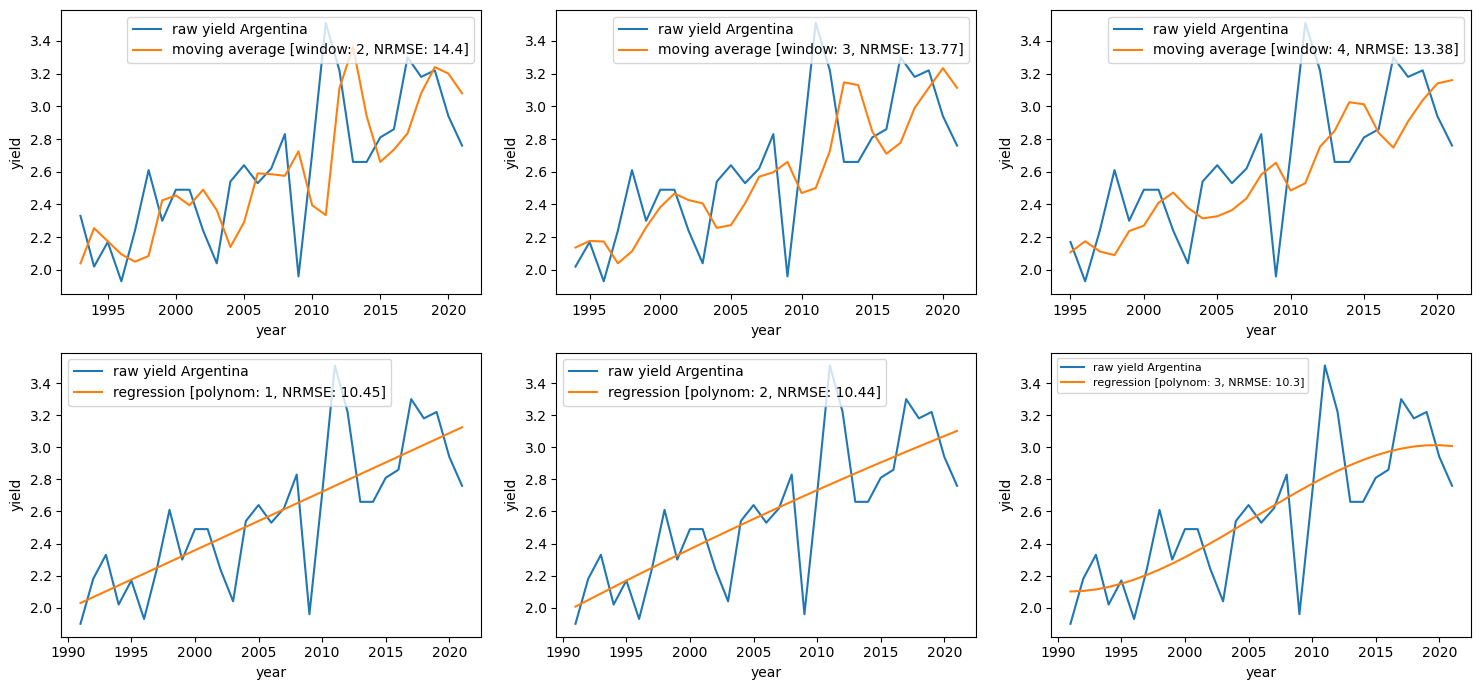

In [60]:
fig, axs = plt.subplots(2, 3, figsize=(15,7))
axs = axs.ravel() 

for window, ax in zip(range(2,5), axs[:3]): # zip(range..) indicates the windows of the rolling mean approaches to be validated
    moving_average = detrend.moving_average_detrending(yield_data, window=window).dropna()
    metric = np.round(100 * mse(moving_average["value"], moving_average["trend_estimated [t/ha]"], squared=False)/(moving_average["value"].mean()), 2)
    detrend.plot_time_series(moving_average, to_plot=["value", "trend_estimated [t/ha]"], labels=["raw yield {}".format(country), "moving average [window: {}, NRMSE: {}]".format(window, metric)], ax=ax);

for polynom, ax in zip(range(1,4), axs[3:6]): # zip(range..) indicates the polynoms of the regression approaches to be validated
    regression = detrend.regression_detrending(yield_data, polynomial=polynom, regressor=LinearRegression()).dropna()
    metric = np.round(100 * mse(regression["value"], regression["trend_estimated [t/ha]"], squared=False)/(regression["value"].mean()), 2)
    detrend.plot_time_series(regression, to_plot=["value", "trend_estimated [t/ha]"], labels=["raw yield {}".format(country), "regression [polynom: {}, NRMSE: {}]".format(polynom, metric)], ax=ax);

plt.legend(loc=2, prop={'size': 8})
plt.tight_layout()
plt.show()
